In [27]:
import spectromancer as sp
import corv
import matplotlib.pyplot as plt
plt.style.use('stefan.mplstyle')

In [12]:
obs = sp.Observation('../data/observations/')

In [15]:
target = obs.targets[0]
name, wave, flux, ivar = target.name, target.spectrum.wave, target.spectrum.flux, target.spectrum.ivar
bad = ((wave > 4750) & (wave < 4770)) | ((wave > 4390) & (wave < 4400))

Text(0, 0.5, 'Flux $[erg/s/cm^2/\\AA]$')

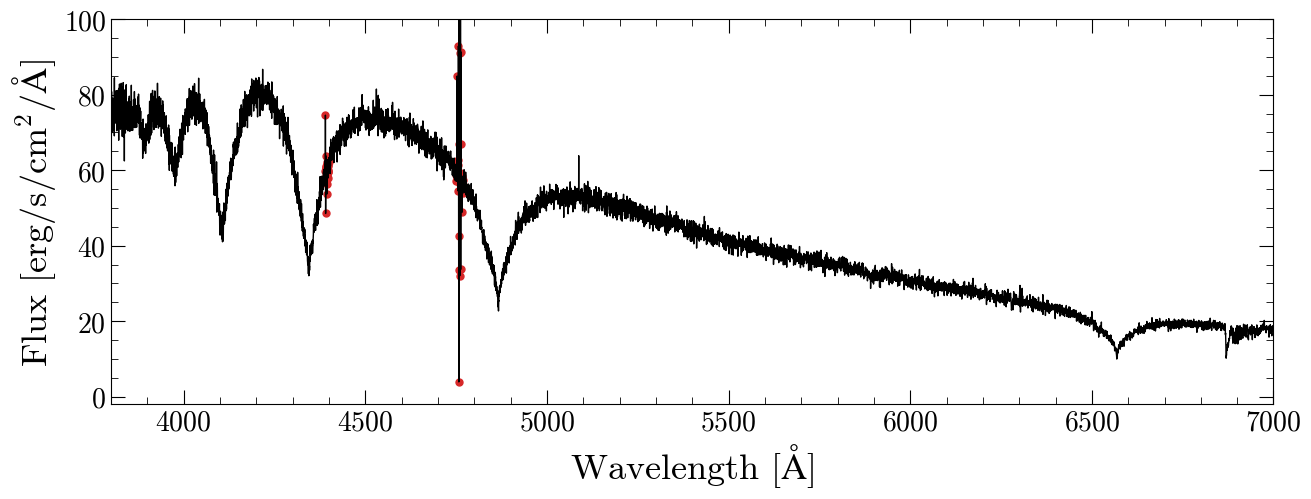

In [24]:
plt.figure(figsize = (15, 5))
plt.plot(wave, flux, lw = 1, color = 'k')
plt.scatter(wave[bad], flux[bad], lw = 1, color = 'C3')
plt.ylim(-2, 100)
plt.xlim(3800, 7000)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux $[erg/s/cm^2/\AA]$')

In [30]:
clean_sp = sp.Spectrum(wave[~bad], flux[~bad], ivar[~bad])
corvmodel = corv.models.make_warwick_da_model(names = ['a','b','g','d'])
rv, e_rv, redchi, param_res = clean_sp.fit_rv(corvmodel)

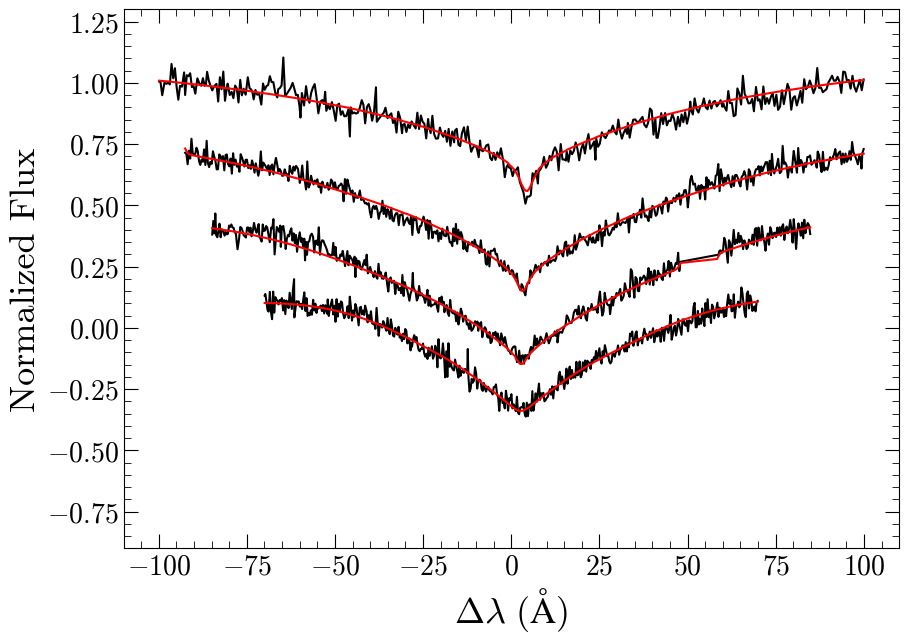

In [34]:
fig = corv.utils.lineplot(wave[~bad], flux[~bad], ivar[~bad], corvmodel, param_res.params, gap = 0.3, printparams = False,
             figsize = (10, 7))
fig.savefig('../figures/example_corvfit.pdf')